# Analisando as vendas da empresa
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Essa é uma base de dados real, porém anonimizada
- Na aula anterior, já fizemos o tratamento da base de vendas, resultando no arquivo `vendas_aula3.xlsx`

## Importando a base e gerando o nosso modelo

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base já tratada da aula anterior
vendas = pd.read_excel('vendas_aula3.xlsx')

In [3]:
vendas.head(3)

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-08-07,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


In [4]:
# Verificando os valores nulos da base
vendas.isnull().sum()

Unnamed: 0                          0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_carrier_date      688
order_delivered_customer_date    1845
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                               0
dtype: int64

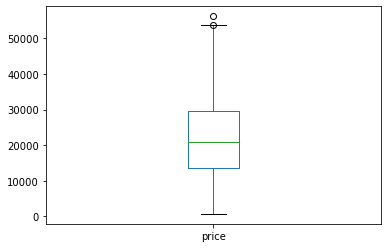

In [7]:
# E os outliers da venda total
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box();

### Relembrando a criação do modelo de Machine Learning

In [16]:
# Criando a base com as informações de mês e ano
vendas_ml = vendas.groupby(['order_purchase_timestamp','mes_compra','ano_compra','grupo'])['price'].sum().reset_index()
vendas_ml = pd.concat([vendas_ml,pd.get_dummies(vendas_ml.grupo)],axis=1)
vendas_ml.head(3)

,order_purchase_timestamp,mes_compra,ano_compra,grupo,price,beleza,carro,casa,construção,crianças,eletro_eletronicos,esporte,games,outros,presentes,produtos_diversos,telefonia_audio_video
0,2017-01-06,1,2017,beleza,636.00,1,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-06,1,2017,crianças,159.99,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-06,1,2017,games,109.90,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
# Separando em treino e teste
import datetime as dt

treino = vendas_ml[vendas_ml.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = vendas_ml[vendas_ml.order_purchase_timestamp > dt.datetime(2018,3,1)]

**Utilizando a regressão linear** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

# Separando X e y para treino
X_treino = treino.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_treino = treino.price

# Fazendo o fit do modelo
reg = LinearRegression().fit(X_treino, y_treino)

# Fazendo a previsão para a base de teste
X_teste = teste.drop(['order_purchase_timestamp','grupo','price'],axis=1)
prev_regLin = reg.predict(X_teste)

**E a árvore de regressão**<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [21]:
# Importando a árvore de regressão
from sklearn.tree import DecisionTreeRegressor

# Criando o regressor
regressor = DecisionTreeRegressor(random_state=0)

# Fazendo o fit do modelo
regressor.fit(X_treino,y_treino)

# Fazendo a previsão para a base de teste
prev_arvore = regressor.predict(X_teste)

**E calculando os erros**
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [22]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [24]:
# Analisando o erro na regressão linear
y_teste = teste.price
y_pred = prev_regLin
mean_absolute_error(y_teste, y_pred)

1427.2076380670605

In [25]:
# Analisando o erro na árvore de regressão
y_teste = teste.price
y_pred = prev_arvore
mean_absolute_error(y_teste, y_pred)

1515.8149457593684

### Podemos melhorar os parâmetros da árvore de decisão
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
# Criando o regressor

# Fazendo o fit do modelo

# Fazendo a previsão para a base de teste

In [ ]:
# Analisando o erro na nova árvore

In [ ]:
# Fazendo um for para testar todos esses valores

In [ ]:
# Criando o regressor

# Fazendo o fit do modelo

# Fazendo a previsão para a base de teste

# Analisando o erro na nova árvore

### Agora testando o Support Vector Regression
- https://scikit-learn.org/stable/modules/svm.html#regression

In [ ]:
# Importando o SVR

In [ ]:
# Criando o nosso regressor

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Prevendo para os dados de teste

In [ ]:
# Calculando o erro médio absoluto

### Fazendo ajustes na base para tentar melhorar o modelo

**Podemos manter apenas alguns grupos**

In [ ]:
# Verificando novamente o X_treino

In [ ]:
# Verificando quais itens mais aparecem nessa base

In [ ]:
# E se mantivermos apenas as colunas de casa, beleza e esporte?

In [ ]:
# Criando o regressor

In [ ]:
# Fazendo o fit do modelo

In [ ]:
# Fazendo a previsão para a base de teste

In [ ]:
# Analisando o erro na nova árvore

# Persistindo o modelo
- https://scikit-learn.org/stable/model_persistence.html

In [ ]:
# Importando o joblib

In [ ]:
# Fazendo o dump do nosso modelo

In [ ]:
# Exportando a base de teste para csv